In [ ]:
#Análisis de datos Jordan Triana, datos abiertos de Bogotá 2022 

In [3]:
from pydoc import describe   #Incluir libreria describe

In [4]:
import pandas as pd     #Incluir libreria pandas

In [5]:
import numpy as np      #Incluir libreria numpy

In [6]:
import matplotlib.pyplot as plt    #Incluir libreria para graficar matplotlib

In [7]:
myData=pd.read_csv("predios_csv_1221.csv", delimiter=';',nrows=1000)     #Leer archivos CSV separados por ";"

In [8]:
def CCleanData(x):                     #Función para limpiar la data, en caso tal de que algunos int, float tengan "." o "espacio"
    x=x.replace(',','.')
    x=x.replace(' ','')
    try: 
        x=round(float(x), 3)
    except:
        x=0
    
    return x

In [9]:
myData=pd.read_csv("predios_csv_1221.csv", delimiter=';',       #Asignar la función CCleanData a las columnas seleccionadas para garantizar el dato correcto
converters={
    'PreAConst':CCleanData, 
    'PreATerre':CCleanData, 
    'PreAUso':CCleanData,
    }, 
nrows=1000)

In [10]:
myData= pd.read_csv('predios_csv_1221.csv', delimiter=';',        #Asignar a las columnas que sean de tipo entero, en este modulo
                                                                #se pueden cambiar los tipos de datos ya sean de tipo int a tipo float
                 dtype={
                     'PreCBarrio': int,
                     'PreCManz': int,
                     'PreCPredio': int,
                     'PreCCons': int,
                 })

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
print(myData.head(10))               #Imprimir la cabecera del data frame, para este caso se seleccionan las primeras 10 columnas

   OBJECTID  PreCBarrio    PreNBarrio  PreCManz  PreCPredio  PreCCons  \
0         1      205401  EL CHANCO II        29          25         0   
1         2      205401  EL CHANCO II        29          25         0   
2         3      205401  EL CHANCO II        29          25         0   
3         4      205401  EL CHANCO II        29          25         0   
4         5      205401  EL CHANCO II        29          25         0   
5         6      205401  EL CHANCO II        29          28         0   
6         7      205401  EL CHANCO II        29          28         0   
7         8      205401  EL CHANCO II        29          29         0   
8         9      205401  EL CHANCO II        29          29         0   
9        10      205401  EL CHANCO II        29          30         0   

   PreCResto      PreChip          PreCedCata                        PreNupre  \
0          0  AAA0140JLHK  105401292500000000  110010254090100290025000000000   
1          0  AAA0140JLHK  1054012

In [12]:
print(myData['PreAUso'])           #Imprime solamente la columna que estoy llamando del Dataframe, por defecto toma los primeros 5 datos y los últimos 5
                                   #En la parte inferior da unas conclusiones de la longitud de la columna y el dtype (tipo de columna)

0          840,000000000000000
1          840,000000000000000
2          840,000000000000000
3          840,000000000000000
4          840,000000000000000
                  ...         
3568959    211,200000000000017
3568960     48,000000000000000
3568961    133,199999999999989
3568962     68,320000000000007
3568963    141,599999999999994
Name: PreAUso, Length: 3568964, dtype: object


In [13]:
print(myData['PreAConst'])         #Imprime solamente la columna que estoy llamando del Dataframe, por defecto toma los primeros 5 datos y los últimos 5
                                   #En la parte inferior da unas conclusiones de la longitud de la columna y el dtype (tipo de columna)

0          5517,300000000000182
1          5517,300000000000182
2          5517,300000000000182
3          5517,300000000000182
4          5517,300000000000182
                   ...         
3568959     259,199999999999989
3568960     259,199999999999989
3568961     201,520000000000010
3568962     201,520000000000010
3568963     141,599999999999994
Name: PreAConst, Length: 3568964, dtype: object


In [14]:
print(myData['PreCCons'])          #Imprime solamente la columna que estoy llamando del Dataframe, por defecto toma los primeros 5 datos y los últimos 5
                                   #En la parte inferior da unas conclusiones de la longitud de la columna y el dtype (tipo de columna)

0          0
1          0
2          0
3          0
4          0
          ..
3568959    0
3568960    0
3568961    0
3568962    0
3568963    0
Name: PreCCons, Length: 3568964, dtype: int32


In [15]:
row=myData.iloc[2500]                     #Se realiza una consulta en la fila "2500" para saber cuales son los datos para el objeto, allí genera la información correpondiente de la fila
print(row)

OBJECTID                                2501
PreCBarrio                              8510
PreNBarrio                   ACACIAS USAQUEN
PreCManz                                  14
PreCPredio                                29
PreCCons                                   1
PreCResto                               8008
PreChip                          AAA0235RWTD
PreCedCata                008510142900108008
PreNupre      110010185011000140029901080008
PreTProp                                   6
PreFIncorp                5/07/2013 15:33:08
PreClase                                   P
PreDirecc               CL 146 12A 89 AP 808
PreMDirecc                                 D
PreTDirecc                               NaN
PreDSI                                   NaN
PreATerre                 29,199999999999999
PreAConst                 90,100000000000009
PreCZHF                        6212315152115
PreCDestin                                 1
PreVetustz                            2012.0
PreVForma 

In [16]:
print (isinstance(row, pd.Series))               #La función isinstance() devuelve True si el objeto especificado es del tipo especificado; de lo contrario, False. 
                                                 #Si el parámetro de tipo es una tupla, esta función devolverá True si el objeto es uno de los tipos de la tupla.

True


In [17]:
print(myData.shape)          #Determina la dimensión del Dataframe (Filas x columnas)

(3568964, 52)


In [18]:
print(myData.info())         #Genera la información de cada columna, con esto se garantiza que operaciones se pueden realizar con cada una de ellas, determinando si son int, floats, o solamente objetos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3568964 entries, 0 to 3568963
Data columns (total 52 columns):
 #   Column      Dtype  
---  ------      -----  
 0   OBJECTID    int64  
 1   PreCBarrio  int32  
 2   PreNBarrio  object 
 3   PreCManz    int32  
 4   PreCPredio  int32  
 5   PreCCons    int32  
 6   PreCResto   int64  
 7   PreChip     object 
 8   PreCedCata  object 
 9   PreNupre    object 
 10  PreTProp    int64  
 11  PreFIncorp  object 
 12  PreClase    object 
 13  PreDirecc   object 
 14  PreMDirecc  object 
 15  PreTDirecc  object 
 16  PreDSI      object 
 17  PreATerre   object 
 18  PreAConst   object 
 19  PreCZHF     object 
 20  PreCDestin  int64  
 21  PreVetustz  float64
 22  PreVForma   float64
 23  PreVActual  float64
 24  PreCUso     float64
 25  PreAUso     object 
 26  PreUsoPH    object 
 27  PreUsoNPH   object 
 28  PreUVivien  object 
 29  PreUCalif   object 
 30  PreFCalif   object 
 31  PrePuntaje  float64
 32  PreEArmaz   float64
 33  PreEMur

In [19]:
print(myData.describe())    #Describe un analisis estadistico de las columnas tipo float64, int32, int64, no asigna estadisticas a las columnas tipo objeto

           OBJECTID    PreCBarrio      PreCManz    PreCPredio      PreCCons  \
count  3.568964e+06  3.568964e+06  3.568964e+06  3.568964e+06  3.568964e+06   
mean   1.784482e+06  9.265308e+03  3.166022e+01  1.564280e+01  3.277323e+00   
std    1.030271e+06  2.470912e+04  2.534485e+01  1.646687e+01  1.745699e+01   
min    1.000000e+00  2.400000e+02  0.000000e+00  0.000000e+00  0.000000e+00   
25%    8.922418e+05  4.310000e+03  1.100000e+01  4.000000e+00  0.000000e+00   
50%    1.784482e+06  5.665000e+03  2.500000e+01  1.100000e+01  1.000000e+00   
75%    2.676723e+06  8.418000e+03  4.700000e+01  2.200000e+01  1.000000e+00   
max    3.568964e+06  2.091060e+05  9.900000e+01  9.900000e+01  9.990000e+02   

          PreCResto      PreTProp    PreCDestin    PreVetustz     PreVForma  \
count  3.568964e+06  3.568964e+06  3.568964e+06  3.466444e+06  3.487975e+06   
mean   1.234949e+04  5.911143e+00  7.457056e+00  1.993626e+03  1.995846e+03   
std    2.912596e+04  6.054684e-01  1.388097e+01  1.

In [20]:
print(myData['PreAConst'].describe())   #Para la columna "PreAConst" describe la cantidad de datos que se encuentran en la columna

count               3568293
unique                71208
top       0,000000000000000
freq                 111296
Name: PreAConst, dtype: object


In [21]:
print(myData['PreBEnchap'].describe())  #Para el caso de la columna "PreBEnchap" realiza el análisis estadístico correspondiente

count    2.526517e+06
mean     2.658394e+02
std      1.234681e+02
min      0.000000e+00
25%      3.220000e+02
50%      3.230000e+02
75%      3.240000e+02
max      3.250000e+02
Name: PreBEnchap, dtype: float64


In [22]:
print(myData['PreCDestin'].describe())  #Para el caso de la columna "PreCManz" realiza el análisis estadístico correspondiente

count    3.568964e+06
mean     7.457056e+00
std      1.388097e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      4.000000e+00
max      9.900000e+01
Name: PreCDestin, dtype: float64


In [23]:
print(myData['PreCDestin'].mean())    #Especifica la media de la columna "PreCDestin"

7.457056445511919


In [24]:
print(myData['PreCDestin'].var())     #Especifica la varianza de la columna "PreCDestin"

192.68120102589276


<Figure size 432x288 with 0 Axes>

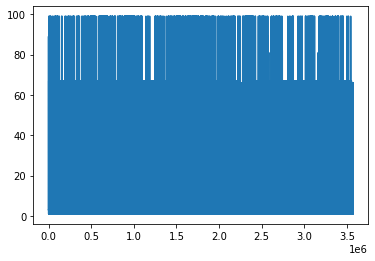

<Figure size 432x288 with 0 Axes>

In [25]:
myData['PreCDestin'].plot()       #Se gráfica la columna "PreCDestin"
plt.figure()

<AxesSubplot:>

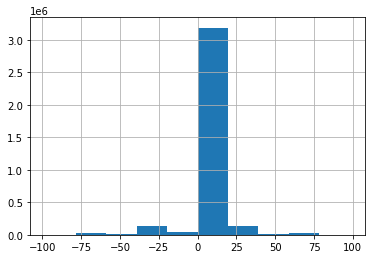

In [26]:
myData['PreCDestin'].diff().hist()     #Histograma para la columna "PreCDestin"

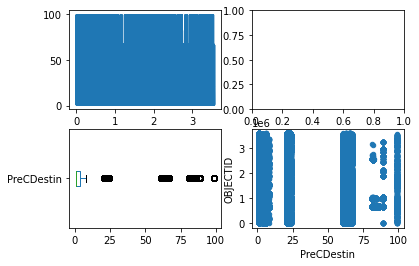

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2)               #Se utiliza el tipo subplot, para graficar de una misma columna varios tipos de graficos
myData['PreCDestin'].plot(ax=axes[0,0])
myData['PreCDestin'].plot(kind='box', ax=axes[1,0], vert=False)
myData.plot.scatter(x='PreCDestin', y='OBJECTID',ax=axes[1,1])
plt.show()

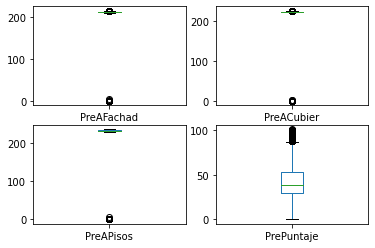

In [34]:
myData[['PreAFachad','PreACubier', 'PreAPisos', 'PrePuntaje']].plot(kind='box', subplots=True, layout=(2,2))   #Varias columnas en subplot
plt.show()

In [35]:
print(myData['PreNBarrio'].value_counts())    #Excluye valores NA por defecto.

EL PLAN                                    22296
LOS CEDROS                                 21850
SANTA BARBARA CENTRAL                      21711
TINTALA                                    21227
LAS MARGARITAS                             21068
                                           ...  
OSORIO XXIII                                   1
LAS GUACAMAYAS                                 1
BULEV DEL SUR, COMPOST.III SEC., LA ESP        1
PUEBLO VIEJO                                   1
EL PORTAL URBANO                               1
Name: PreNBarrio, Length: 1133, dtype: int64


<Figure size 432x288 with 0 Axes>

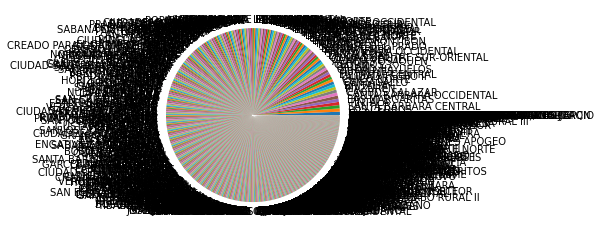

<Figure size 432x288 with 0 Axes>

In [37]:
myData['PreNBarrio'].value_counts().plot(kind='pie')     #Grafica en forma de PIE la columna "PreNBarrio"
plt.figure()

<AxesSubplot:ylabel='Cantidad de Predios'>

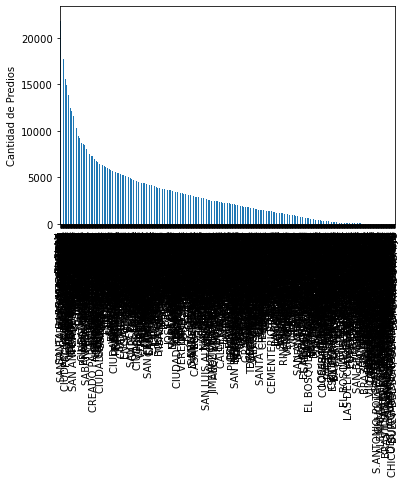

In [38]:
myData['PreNBarrio'].value_counts().plot(kind='bar', ylabel='Cantidad de Predios')

In [39]:
corr=myData.corr()     #Se correlacionan las columnas 

In [40]:
print(corr.to_string())    #Se asignan las columnas a tipo string, es decir cadena de texto

            OBJECTID  PreCBarrio  PreCManz  PreCPredio  PreCCons  PreCResto  PreTProp  PreCDestin  PreVetustz  PreVForma  PreVActual   PreCUso  PrePuntaje  PreEArmaz  PreEMuros  PreECubier  PreECons  PreAFachad  PreACubier  PreAPisos  PreACons  PreBTamano  PreBEnchap  PreBMobili  PreBCons  PreCTamano  PreCEnchap  PreCMobili  PreCConse  PreCIndus  PreACercha  Barmanpre
OBJECTID    1.000000    0.044830  0.004180   -0.026564  0.011474   0.020522  0.000480   -0.032337    0.054966  -0.023528    0.066456  0.072196    0.073505  -0.013872  -0.007260   -0.016317 -0.017439    0.008059   -0.005518   0.010748  0.009870   -0.015656    0.001536    0.008941  0.000907   -0.016451    0.002291    0.002895   0.002165   0.013196   -0.000775   0.044830
PreCBarrio  0.044830    1.000000 -0.095636   -0.021678  0.102392  -0.003135  0.017054    0.129129    0.126930   0.024825   -0.290061  0.070067   -0.010013   0.009519   0.009834    0.002591  0.014461    0.000837    0.010295  -0.015216  0.003759    0.038237   

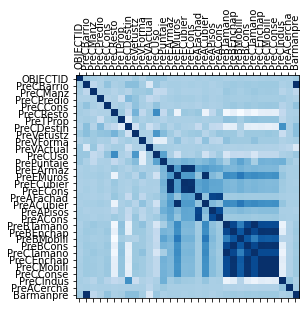

In [45]:
myMatrixGraph=plt.figure()          #Se grafica para saber cuales son las columnas que tienen mayor correlación entre ellas.
plt.matshow(corr, myMatrixGraph.number, cmap='Blues')
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

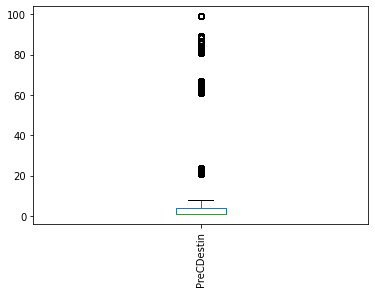

            PreNBarrio  PreCDestin
0         EL CHANCO II           3
1         EL CHANCO II           3
2         EL CHANCO II           3
3         EL CHANCO II           3
4         EL CHANCO II           3
...                ...         ...
3568959  VILLA DEL MAR           1
3568960  VILLA DEL MAR           1
3568961  VILLA DEL MAR           1
3568962  VILLA DEL MAR           1
3568963  VILLA DEL MAR           1

[3568964 rows x 2 columns]


In [47]:
boxData=myData[['PreNBarrio','PreCDestin']]
boxData.plot(by='PreNBarrio', kind='box')
plt.xticks(rotation='vertical')
plt.show()

print(boxData)